In [41]:
import os

import numpy as np
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

from utils import load_hidden_representations_from_hdf5

----

## Plot t-SNE embeddings

In [71]:
# specify input file
log_dir = "/logfiles"

Reading embeddings: 100%|██████████| 100/100 [00:00<00:00, 5184.87it/s]


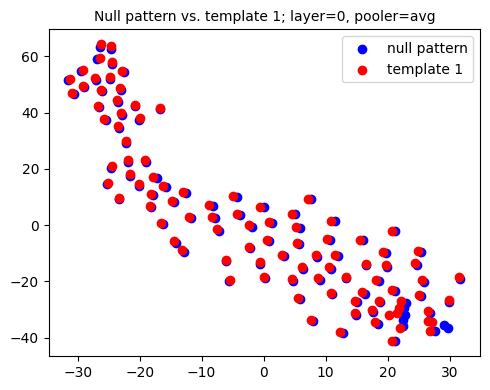

Reading embeddings: 100%|██████████| 100/100 [00:00<00:00, 5334.91it/s]


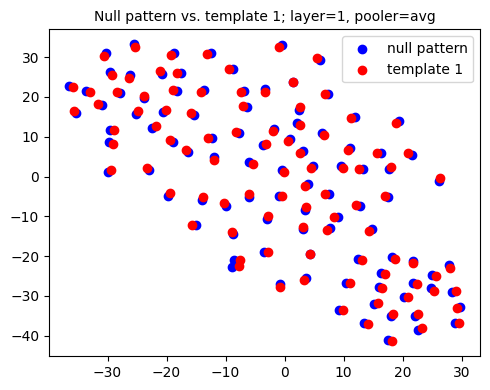

Reading embeddings: 100%|██████████| 100/100 [00:00<00:00, 5103.43it/s]


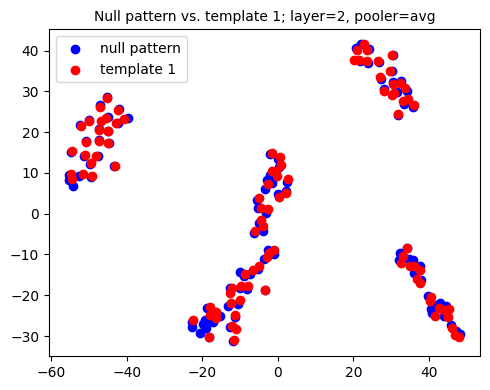

Reading embeddings: 100%|██████████| 100/100 [00:00<00:00, 5166.16it/s]


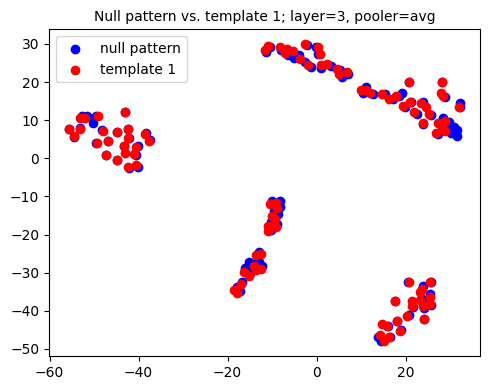

Reading embeddings: 100%|██████████| 100/100 [00:00<00:00, 4622.08it/s]


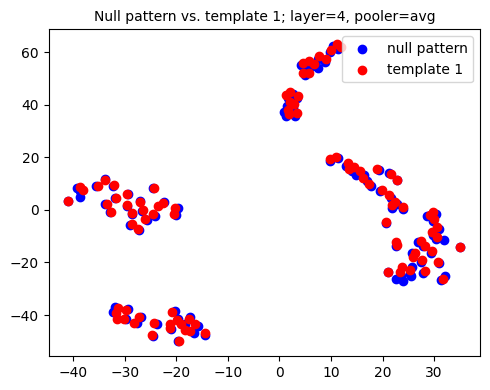

Reading embeddings: 100%|██████████| 100/100 [00:00<00:00, 5327.79it/s]


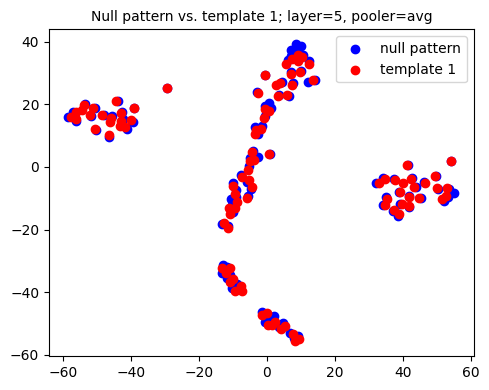

Reading embeddings: 100%|██████████| 100/100 [00:00<00:00, 4540.57it/s]


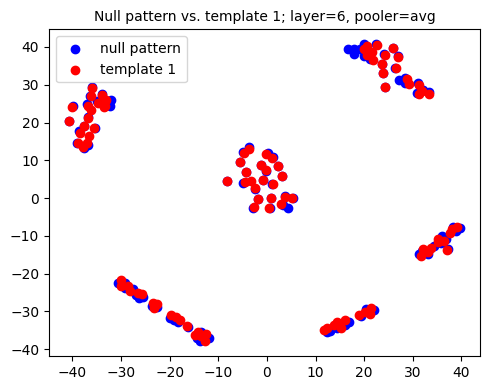

Reading embeddings: 100%|██████████| 100/100 [00:00<00:00, 3870.61it/s]


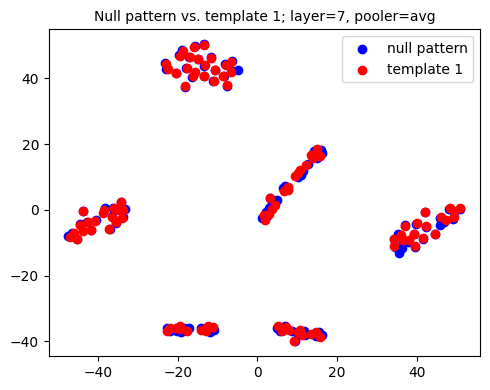

Reading embeddings: 100%|██████████| 100/100 [00:00<00:00, 4714.50it/s]


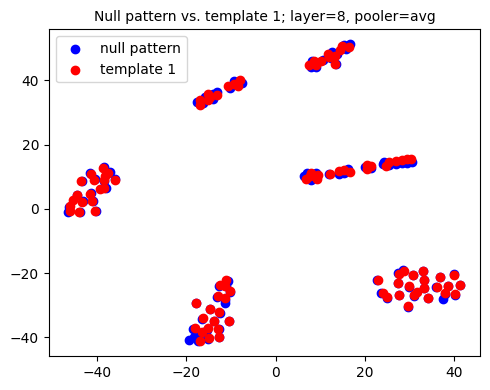

Reading embeddings: 100%|██████████| 100/100 [00:00<00:00, 4588.20it/s]


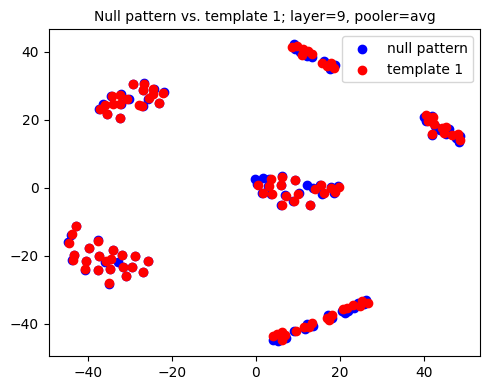

Reading embeddings: 100%|██████████| 100/100 [00:00<00:00, 4942.44it/s]


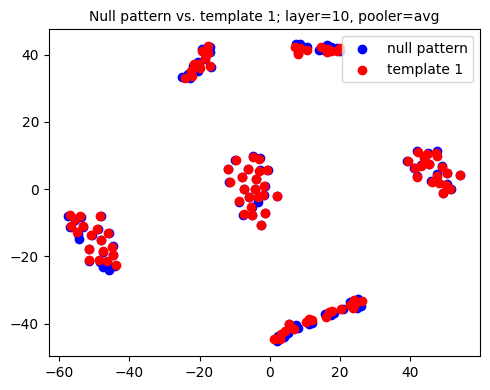

Reading embeddings: 100%|██████████| 100/100 [00:00<00:00, 5169.28it/s]


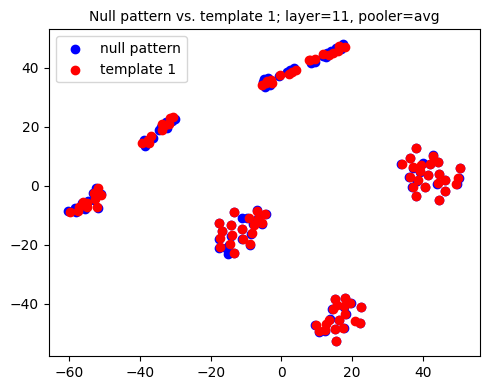

Reading embeddings: 100%|██████████| 100/100 [00:00<00:00, 5301.93it/s]


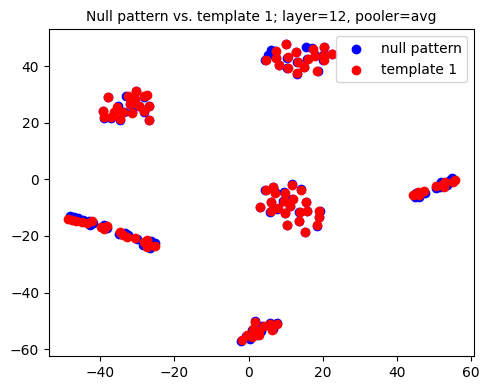

Reading embeddings: 100%|██████████| 100/100 [00:00<00:00, 3938.50it/s]


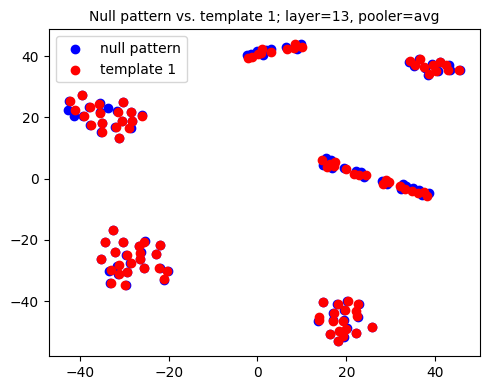

Reading embeddings: 100%|██████████| 100/100 [00:00<00:00, 5161.39it/s]


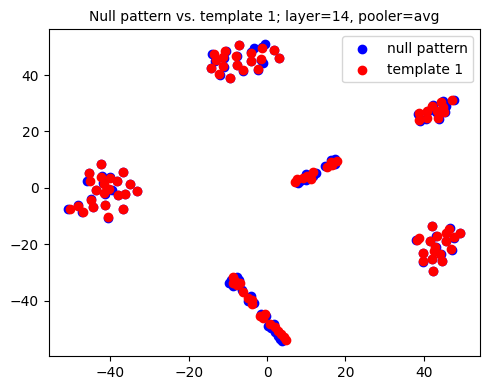

Reading embeddings: 100%|██████████| 100/100 [00:00<00:00, 5006.27it/s]


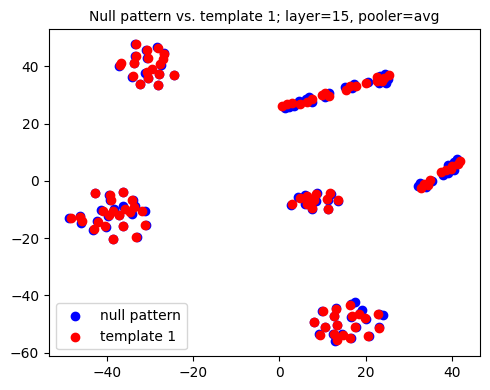

Reading embeddings: 100%|██████████| 100/100 [00:00<00:00, 5118.31it/s]


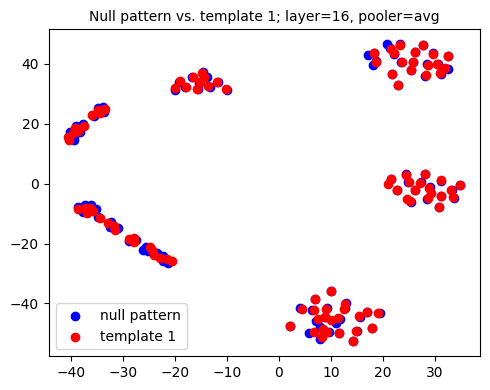

Reading embeddings: 100%|██████████| 100/100 [00:00<00:00, 4233.72it/s]


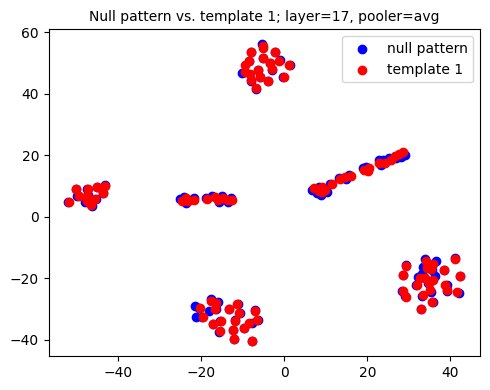

Reading embeddings: 100%|██████████| 100/100 [00:00<00:00, 5189.17it/s]


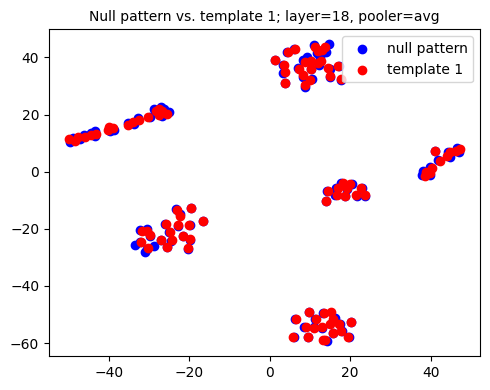

Reading embeddings: 100%|██████████| 100/100 [00:00<00:00, 4176.76it/s]


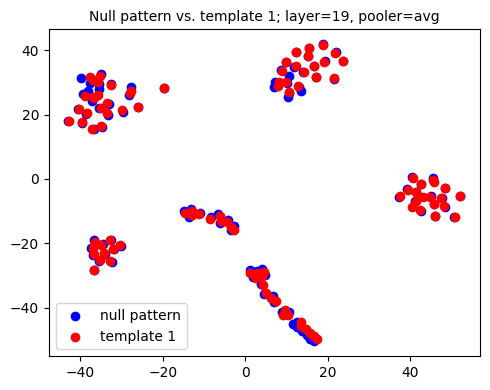

Reading embeddings: 100%|██████████| 100/100 [00:00<00:00, 5152.07it/s]


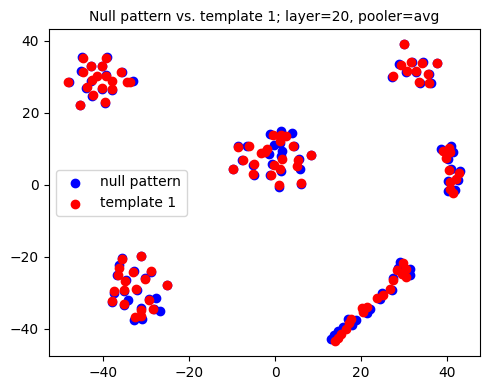

Reading embeddings: 100%|██████████| 100/100 [00:00<00:00, 4845.77it/s]


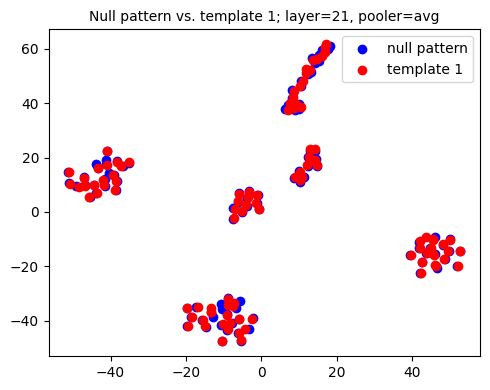

Reading embeddings: 100%|██████████| 100/100 [00:00<00:00, 4926.82it/s]


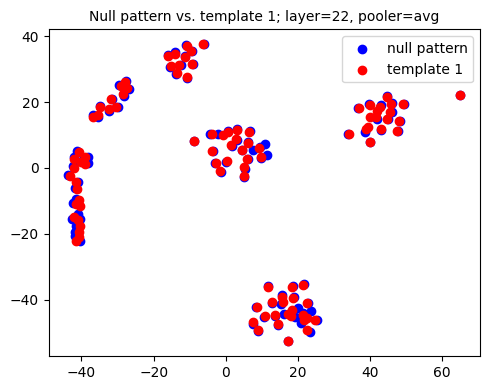

Reading embeddings: 100%|██████████| 100/100 [00:00<00:00, 4837.89it/s]


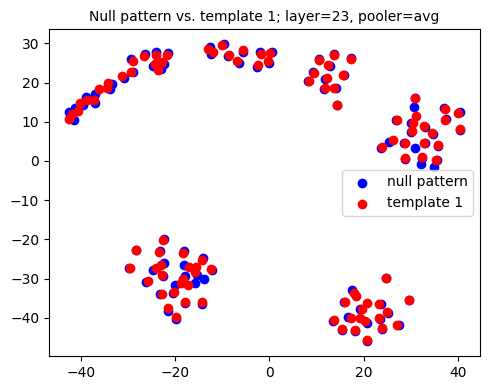

Reading embeddings: 100%|██████████| 100/100 [00:00<00:00, 5242.09it/s]


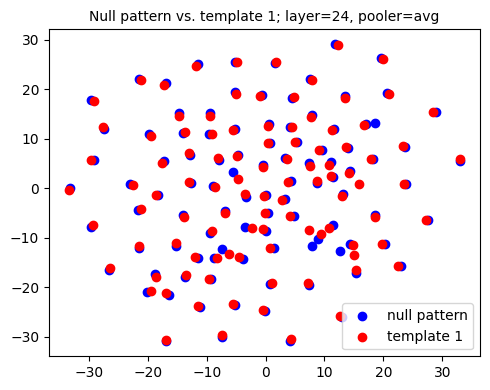

In [77]:
# for layer in range(0, 1):
for layer in range(0, 25):
    file_names = [
        f"null_pattern/hidden_represenations_bigscience-T0_3B_layer{layer}_avg.hdf5",
        f"template_1/hidden_represenations_bigscience-T0_3B_layer{layer}_avg.hdf5",
    ]   

    # load hidden representations from hdf5 file
    representations = None
    n_sequences = 0

    for file_name in file_names:
        hidden_representations = load_hidden_representations_from_hdf5(os.path.join(log_dir, file_name))
        n_sequences = hidden_representations.shape[0]

        if representations is None:
            representations = hidden_representations
        else:
            representations = np.concatenate((representations, hidden_representations), axis=0)

    # compute t-SNE embeddings
    X = TSNE(
        n_components=2, 
        perplexity=10, 
        init='random',
        learning_rate=100,
        n_iter=1000
    ).fit_transform(representations)

    # plot t-SNE embeddings
    fig, axes = plt.subplots(1, 1, figsize=(5,4), dpi=100)

    axes.scatter(X[:n_sequences, 0], X[:n_sequences, 1], color='blue', label='null pattern')
    axes.scatter(X[n_sequences:, 0], X[n_sequences:, 1], color='red', label='template 1')

    axes.set_title(f"Null pattern vs. template 1; layer={layer}, pooler=avg", fontsize=10)

    axes.legend(loc="best")

    plt.tight_layout()

    plt.show()
    plt.close();